<a href="https://colab.research.google.com/github/ira235/Minimum-Wage-Analysis/blob/main/Copy_of_Minimum_Wage_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
outfile = open("kaggle.json","w")
outfile.write('{"username":"heejeyoo","key":"971b7979f94b629f1351b8574d482d76"}')
outfile.close()

In [ ]:
!mkdir /root/.kaggle
!mv kaggle.json /root/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [ ]:
api.dataset_download_file("peipeichen/minimum-wage-by-country","minimum_wage.csv")

Dataset URL: https://www.kaggle.com/datasets/peipeichen/minimum-wage-by-country


False

In [ ]:
api.dataset_download_file("hserdaraltan/countries-by-continent","Countries by continents.csv")

Dataset URL: https://www.kaggle.com/datasets/hserdaraltan/countries-by-continent


True

In [ ]:
import os

# Rename the file from encoded to plain text
os.rename('Countries%20by%20continents.csv', 'countries by continent.csv')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("minimum_wage.csv")
df

,Country,Annual-Nominal (US$),Annual-PPP (Int$),Workweek (hours),Hourly-Nominal (US$),Hourly-PPP (Int$),Percent of GDP per capita,Effective per
0,Afghanistan,1047.0,3272.0,40.0,0.50,1.57,168.30%,2017
1,Albania,2418.0,5218.0,40.0,1.16,2.51,45.20%,5 May 2017
2,Algeria,2163.0,6247.0,40.0,1.04,3.00,41.60%,1 May 2020
3,Andorra,14243.0,11020.0,40.0,6.85,5.30,28%,1 January 2019
4,Angola,1681.0,2108.0,44.0,0.73,0.92,32.70%,1 April 2019
...,...,...,...,...,...,...,...,...
196,Venezuela,1032.0,NaN,NaN,NaN,NaN,NaN,1 May 2020
197,Vietnam,1526.0,3676.0,40.0,0.73,1.77,58.40%,1 January 2018
198,Yemen,NaN,NaN,48.0,NaN,NaN,NaN,2013
199,Zambia,1252.0,3180.0,48.0,0.50,1.27,80.80%,10 September 2018


In [ ]:
# Clean column names
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('\xa0', '_')
    .str.replace('-', '_')
    .str.replace('(', '')
    .str.replace(')', '')
)

In [ ]:
# Rename for clarity
df = df.rename(columns={
    'annual_nominal_us$': 'annual_nominal_usd',
    'annual_ppp_int$': 'annual_ppp_usd',
    'hourly_nominal_us$': 'hourly_nominal_usd',
    'hourly_ppp_int$': 'hourly_ppp_usd'
})

In [ ]:
# Convert wage columns to numeric
wage_columns = [
    'annual_nominal_usd',
    'annual_ppp_usd',
    'hourly_nominal_usd',
    'hourly_ppp_usd'
]

for col in wage_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
# Drop rows with missing wage values
df = df.dropna(subset=wage_columns)

In [ ]:
#Cleaning Dates by Removing Month and Day and keeping year only
df['effective_per'] = df['effective_per'].astype(str).str[-4:]

In [ ]:
# Adding Continents to Countries
continent_df = pd.read_csv('countries by continent.csv')
continent_df = continent_df.rename(columns={'Country': 'country'})
df = pd.merge(df, continent_df, on='country')
df

,country,annual_nominal_usd,annual_ppp_usd,workweek__hours,hourly_nominal_usd,hourly_ppp_usd,percent_of__gdp_per_capita,effective_per,Continent
0,Afghanistan,1047.0,3272.0,40.0,0.50,1.57,168.30%,2017,Asia
1,Albania,2418.0,5218.0,40.0,1.16,2.51,45.20%,2017,Europe
2,Algeria,2163.0,6247.0,40.0,1.04,3.00,41.60%,2020,Africa
3,Andorra,14243.0,11020.0,40.0,6.85,5.30,28%,2019,Europe
4,Angola,1681.0,2108.0,44.0,0.73,0.92,32.70%,2019,Africa
...,...,...,...,...,...,...,...,...,...
139,Uruguay,7502.0,9183.0,48.0,3.01,3.68,42.50%,2021,South America
140,Uzbekistan,2969.0,7954.0,40.0,1.43,3.82,122.10%,2019,Asia
141,Vanuatu,3331.0,3041.0,40.0,1.60,1.46,98.70%,2012,Oceania
142,Vietnam,1526.0,3676.0,40.0,0.73,1.77,58.40%,2018,Asia


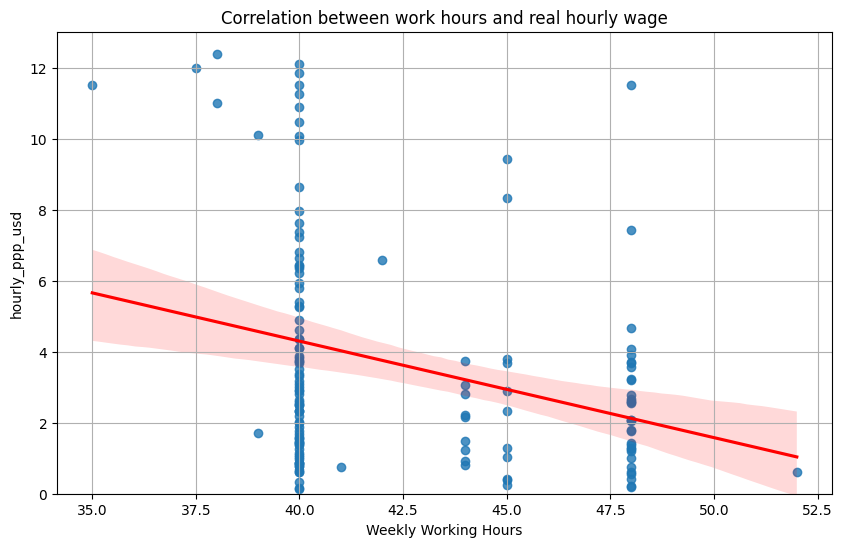

<Figure size 640x480 with 0 Axes>

In [ ]:
#Question 1 Is there a correlation between work hours and real hourly wage? (hourly_ppp_usd , workweek__hours )
corr = df[['workweek__hours','hourly_ppp_usd']].dropna()

#regression graph with hourly_ppp/workweek_hours
plt.figure(figsize=(10,6))
sns.regplot(x = 'workweek__hours', y = 'hourly_ppp_usd',data = corr,line_kws={'color':'red'})
plt.title('Correlation between work hours and real hourly wage')
plt.xlabel('Weekly Working Hours')
plt.grid()
plt.ylim(0)
plt.show()
plt.savefig("regplot_hourly_ppp.png")

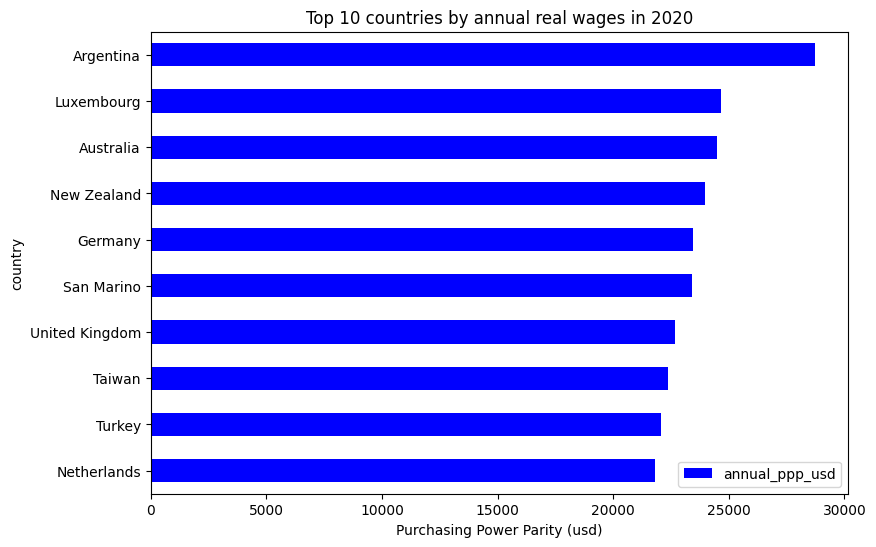

In [ ]:
# What is the global distribution of minimum wages (Top 10) ? (using hourly_ppp_usd)
df.sort_values(by='annual_ppp_usd', ascending=False).head(10).plot(kind='barh',x= 'country', y='annual_ppp_usd', color='blue',figsize=(9, 6))

plt.xlabel('Purchasing Power Parity (usd)')
plt.title('Top 10 countries by annual real wages in 2020')
plt.gca().invert_yaxis()  # Highest wage at the top
plt.show()

In [ ]:
# Question 3: Are there outlier countries?
#desc_stats = df[['annual_nominal_usd', 'annual_ppp_usd', 'hourly_ppp_usd']].describe()
desc_stats = df.rename(columns={'annual_nominal_usd': 'Annual Nominal USD',
                                'annual_ppp_usd': 'Annual PPP USD',
                                'workweek__hours': 'Work Week Hours',
                                'hourly_nominal_usd': 'Hourly Nominal USD',
                                'hourly_ppp_usd': 'Hourly PPP USD'}).describe()
desc_stats = desc_stats.round(0)
desc_stats.to_csv("summary_describe.csv")
desc_stats

,Annual Nominal USD,Annual PPP USD,Work Week Hours,Hourly Nominal USD,Hourly PPP USD
count,144.0,144.0,144.0,144.0,144.0
mean,5439.0,7832.0,42.0,3.0,4.0
std,6615.0,6643.0,4.0,3.0,3.0
min,96.0,295.0,35.0,0.0,0.0
25%,1268.0,3002.0,40.0,1.0,1.0
50%,2785.0,5932.0,40.0,1.0,3.0
75%,6550.0,10195.0,45.0,3.0,5.0
max,30152.0,28722.0,52.0,15.0,12.0


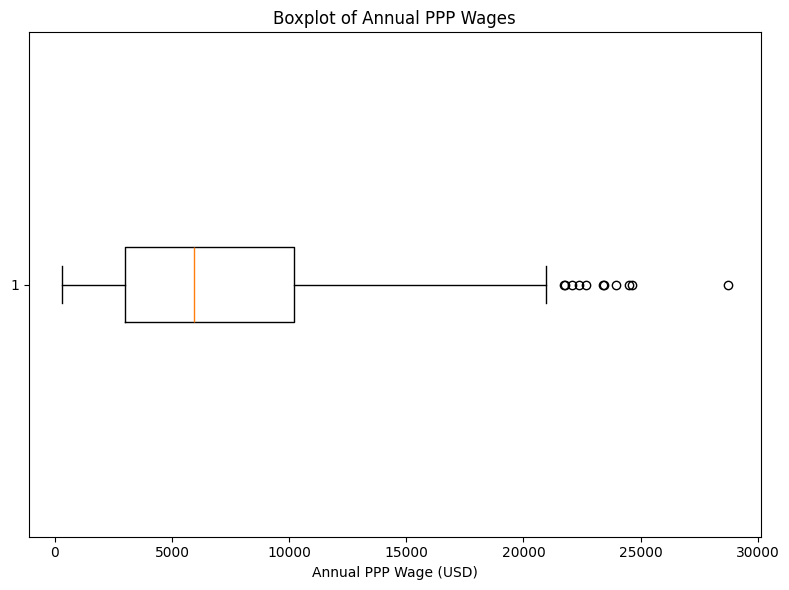

In [ ]:
#Question 3 Pt2
# Boxplot for annual PPP wage
plt.figure(figsize=(8, 6))
plt.boxplot(df['annual_ppp_usd'], vert=False)
plt.title('Boxplot of Annual PPP Wages')
plt.xlabel('Annual PPP Wage (USD)')
plt.tight_layout()
plt.savefig("boxplot_annual_ppp.png")
plt.show()

<Axes: xlabel='country'>

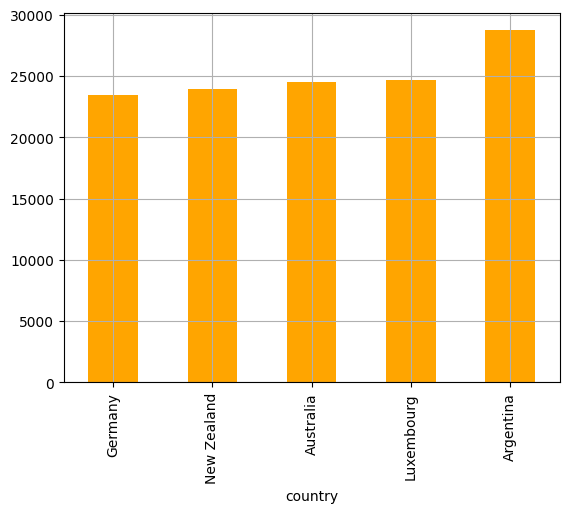

In [ ]:
#Graph top 5
df.groupby(by="country")["annual_ppp_usd"].sum().sort_values().tail(5).plot(kind = "bar", color = "orange", grid = True)

<Axes: xlabel='country'>

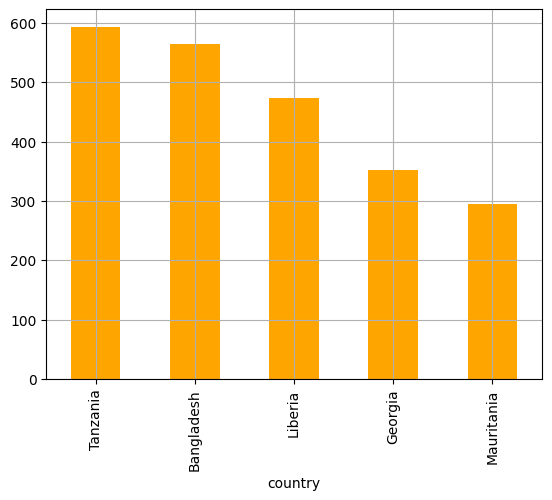

In [ ]:
#Graph bottom 5
df.groupby(by="country")["annual_ppp_usd"].sum().sort_values(ascending=False).tail(5).plot(kind='bar', color='orange', grid=True)

Average Weekly Work Hours by Continent


,continent,avg_work_hours
0,Africa,42.92
1,Asia,43.06
2,Europe,39.84
3,North America,43.65
4,Oceania,41.50
5,South America,45.70


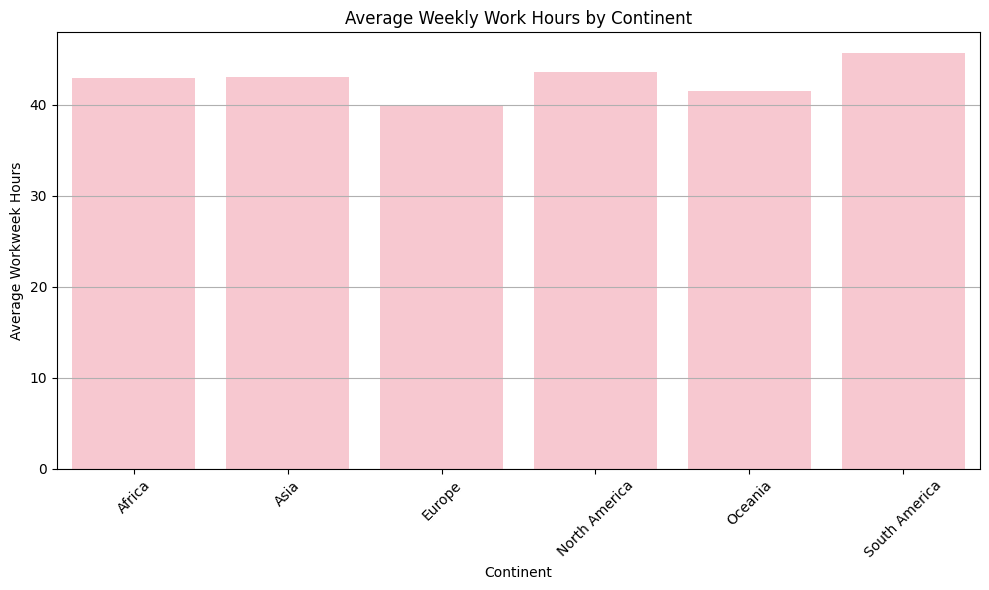

In [ ]:
#Continent Analysis
# Group by continent and calculate average work hours
avg_hours_by_continent = df.groupby('Continent')['workweek__hours'].mean().reset_index()
avg_hours_by_continent = avg_hours_by_continent.round(2)
avg_hours_by_continent.columns = ['continent', 'avg_work_hours']

#Table View
print("Average Weekly Work Hours by Continent")
display(avg_hours_by_continent)

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_hours_by_continent, x='continent', y='avg_work_hours', color='pink')
plt.title('Average Weekly Work Hours by Continent')
plt.xlabel('Continent')
plt.ylabel('Average Workweek Hours')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
#Continent Analysis
#Group by continent and calculate average PPP and nominal wages
avg_wages_by_continent = df.groupby('Continent')[['hourly_nominal_usd', 'hourly_ppp_usd',]].mean().reset_index()
avg_wages_by_continent['Difference'] = avg_wages_by_continent['hourly_ppp_usd'] - avg_wages_by_continent['hourly_nominal_usd']
avg_wages_by_continent = avg_wages_by_continent.round(2)
avg_wages_by_continent = avg_wages_by_continent.sort_values(by='Difference', ascending=False)
print("Average Hourly Minimum Wages by Continent (PPP & Nominal)")
display(avg_wages_by_continent)


Average Hourly Minimum Wages by Continent (PPP & Nominal)


,Continent,hourly_nominal_usd,hourly_ppp_usd,Difference
5,South America,2.00,4.07,2.07
1,Asia,1.92,3.38,1.46
2,Europe,5.08,6.51,1.43
0,Africa,0.68,1.41,0.73
3,North America,2.34,3.01,0.68
4,Oceania,3.98,3.64,-0.34


In [ ]:
import sqlite3
conn = sqlite3.connect("minimum_wage_analysis.db")
df.to_sql("wages_cleaned", conn, if_exists="replace", index=False)
conn.close()

In [ ]:
conn = sqlite3.connect("minimum_wage_analysis.db")
pd.read_sql("SELECT * FROM wages_cleaned LIMIT 5", conn)

,country,annual_nominal_usd,annual_ppp_usd,workweek__hours,hourly_nominal_usd,hourly_ppp_usd,percent_of__gdp_per_capita,effective_per,Continent
0,Afghanistan,1047.0,3272.0,40.0,0.50,1.57,168.30%,2017,Asia
1,Albania,2418.0,5218.0,40.0,1.16,2.51,45.20%,2017,Europe
2,Algeria,2163.0,6247.0,40.0,1.04,3.00,41.60%,2020,Africa
3,Andorra,14243.0,11020.0,40.0,6.85,5.30,28%,2019,Europe
4,Angola,1681.0,2108.0,44.0,0.73,0.92,32.70%,2019,Africa
